In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
import numpy as onp
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
from sklearn.preprocessing import StandardScaler

# Study all available data

In [4]:
df=pd.read_csv("france_covid_data.csv")
df=df.drop("date",axis=1)
df

,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,...,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
0,589.0,272296.0,24620.0,107.0,42622.0,2650.0,2.0,2.0,2.0,4.0,...,2556944.0,43551.0,25148369.0,34726580.0,609.0,609.0,55.0,55.0,664.0,664.0
1,1217.0,273513.0,24645.0,229.0,42851.0,2694.0,2.0,2.0,2.0,4.0,...,2559904.0,43914.0,25339091.0,35124318.0,683.0,1292.0,42.0,97.0,725.0,1389.0
2,1627.0,275140.0,24743.0,251.0,43102.0,2666.0,2.0,2.0,2.0,4.0,...,2571299.0,44298.0,25530897.0,35490439.0,384.0,1676.0,19.0,116.0,403.0,1792.0
3,1404.0,276544.0,24560.0,209.0,43311.0,2652.0,2.0,2.0,2.0,4.0,...,2597756.0,44601.0,25723942.0,35889993.0,443.0,2119.0,18.0,134.0,461.0,2253.0
4,1317.0,277861.0,24407.0,177.0,43488.0,2625.0,2.0,2.0,2.0,4.0,...,2617683.0,44852.0,25918163.0,36227201.0,440.0,2559.0,23.0,157.0,463.0,2716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,756.0,822964.0,19272.0,77.0,136447.0,1233.0,0.0,1.0,0.0,0.0,...,3558022.0,147257.0,231965820.0,272612209.0,1957.0,54446241.0,2027.0,53539427.0,3984.0,107985668.0
503,387.0,823351.0,18901.0,42.0,136489.0,1213.0,0.0,1.0,0.0,0.0,...,3558022.0,147331.0,232619554.0,272775929.0,1143.0,54447384.0,1169.0,53540596.0,2312.0,107987980.0
504,145.0,823496.0,18935.0,13.0,136502.0,1214.0,0.0,1.0,0.0,0.0,...,3558022.0,147352.0,233273381.0,272775929.0,280.0,54447664.0,279.0,53540875.0,559.0,107988539.0
505,900.0,824396.0,18742.0,94.0,136596.0,1199.0,0.0,1.0,0.0,0.0,...,3558022.0,147478.0,233928156.0,272775929.0,1178.0,54448842.0,1206.0,53542081.0,2384.0,107990923.0


In [15]:

node_names=df.columns
X=df.to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)

In [21]:
node_names

Index(['new_hospitalized_patients', 'cumulative_hospitalized_patients',
       'current_hospitalized_patients', 'new_intensive_care_patients',
       'cumulative_intensive_care_patients', 'current_intensive_care_patients',
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'income_support', 'facial_coverings', 'vaccination_policy',
       'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered',
       'new_tested', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated',
       'cumulative_persons_fully_vaccinated', 'new_vaccine_doses_administered',
       'cumulative_vaccine_doses_administered'],
      dtype='object')

In [5]:
beta=onp.array([0.1,0.01,0.001])

In [16]:

graph_discovery=GraphDiscoveryNew(X.T,beta,onp.array(node_names),l=1)

Computing kernel matrix


inspecting new_hospitalized_patients
linear kernel (using gamma=1.17e-02)
 n/(n+s)=0.99, Z=-8.00
decision : refused
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.93, Z=-1.90
decision : refused
gaussian kernel (using gamma=2.54e+01)
 n/(n+s)=0.28, Z=-2.01
decision : accepted
new_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.28)
ancestors after pruning:  ['new_intensive_care_patients'] 



inspecting cumulative_hospitalized_patients
linear kernel (using gamma=2.69e-02)
 n/(n+s)=0.15, Z=-15.49
decision : accepted
cumulative_hospitalized_patients has ancestors with linear kernel (n/(s+n)=0.15)
ancestors after pruning:  ['current_hospitalized_patients', 'cumulative_intensive_care_patients', 'new_recovered'] 



inspecting current_hospitalized_patients
linear kernel (using gamma=1.31e-03)
 n/(n+s)=0.61, Z=-15.45
decision : refused
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.93, Z=-2.74
decision : refused
gaussian kernel (using gamma=3.77e+01)
 n/(n+s)=0.10, 

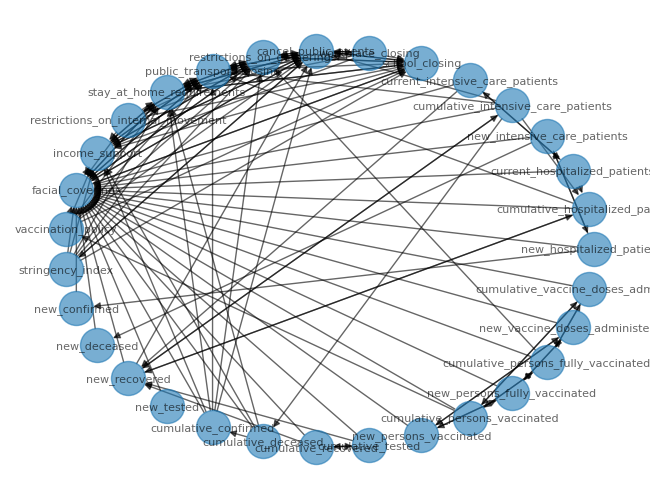

In [17]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
graph_discovery.plot_graph()

In [31]:
import pickle

# save graph object to file
pickle.dump(graph_discovery.G, open('full_covid_graph.pickle', 'wb'))

In [83]:
graph_discovery.G.edges

OutEdgeView([('new_hospitalized_patients', 'new_intensive_care_patients'), ('new_hospitalized_patients', 'facial_coverings'), ('new_hospitalized_patients', 'new_confirmed'), ('cumulative_hospitalized_patients', 'public_transport_closing'), ('cumulative_hospitalized_patients', 'facial_coverings'), ('cumulative_hospitalized_patients', 'new_recovered'), ('current_hospitalized_patients', 'cumulative_hospitalized_patients'), ('current_hospitalized_patients', 'current_intensive_care_patients'), ('current_hospitalized_patients', 'facial_coverings'), ('new_intensive_care_patients', 'new_hospitalized_patients'), ('new_intensive_care_patients', 'facial_coverings'), ('new_intensive_care_patients', 'new_deceased'), ('cumulative_intensive_care_patients', 'cumulative_hospitalized_patients'), ('cumulative_intensive_care_patients', 'cancel_public_events'), ('cumulative_intensive_care_patients', 'public_transport_closing'), ('cumulative_intensive_care_patients', 'facial_coverings'), ('cumulative_intens

In [88]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))

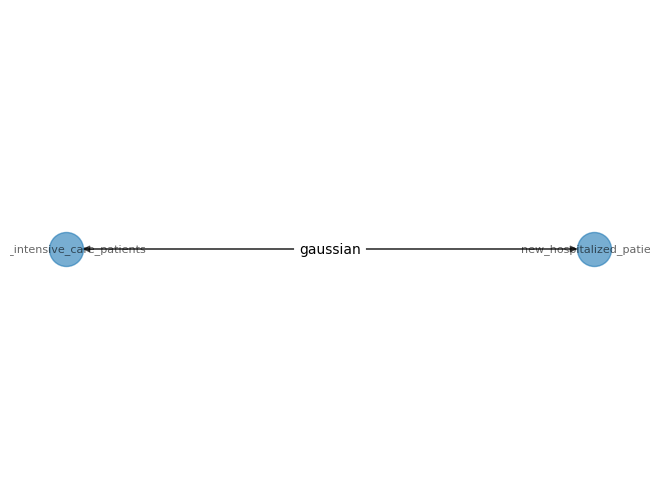

In [85]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_intensive_care_patients',undirected=False,radius=2).reverse())

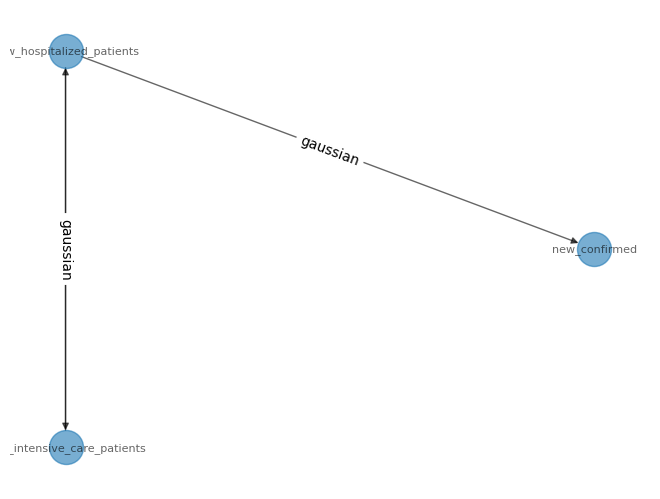

In [86]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_confirmed',undirected=False,radius=2).reverse())

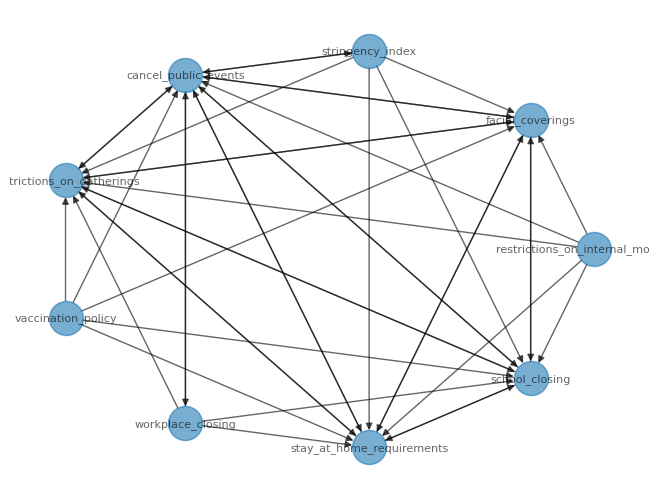

In [89]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'school_closing',undirected=False,radius=1).reverse(),type_label=False)

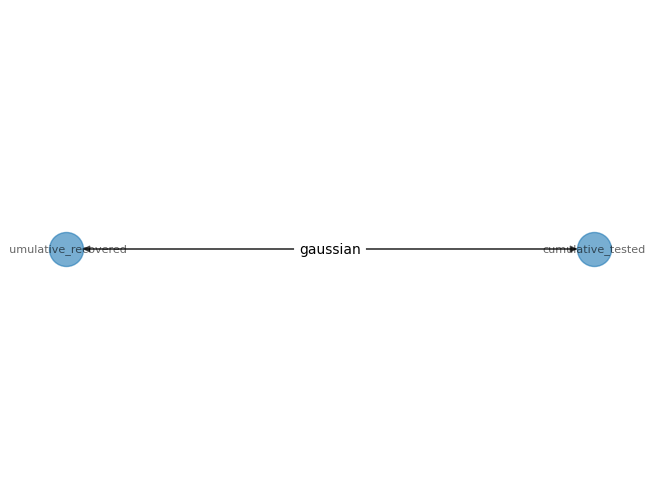

In [90]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'cumulative_recovered',undirected=False,radius=1).reverse())

# Remove cumulative

In [66]:
no_cumulatives=['new_hospitalized_patients',
       'current_hospitalized_patients', 'new_intensive_care_patients',
        'current_intensive_care_patients',
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'income_support', 'facial_coverings', 'vaccination_policy',
       'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered',
       'new_tested', 'new_persons_vaccinated',
       'new_persons_fully_vaccinated',
        'new_vaccine_doses_administered']
X_no_cumul=df[no_cumulatives].to_numpy()
X_no_cumul=(X_no_cumul-onp.mean(X_no_cumul,axis=0))/onp.std(X_no_cumul,axis=0)

In [67]:
graph_discovery_no_cumul=GraphDiscoveryNew(X_no_cumul.T,beta,onp.array(no_cumulatives),l=1)

Computing kernel matrix


inspecting new_hospitalized_patients
linear kernel (using gamma=1.33e+00)
 n/(n+s)=0.78, Z=-15.34
decision : refused
quadratic kernel (using gamma=5.10e-07)
 n/(n+s)=1.00, Z=-1.03
decision : refused
gaussian kernel (using gamma=2.06e-02)
 n/(n+s)=0.24, Z=-1.97
decision : accepted
new_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.24)
ancestors after pruning:  ['current_hospitalized_patients'] 



inspecting current_hospitalized_patients
linear kernel (using gamma=1.68e+00)
 n/(n+s)=0.61, Z=-15.52
decision : refused
quadratic kernel (using gamma=8.44e-06)
 n/(n+s)=0.99, Z=-3.76
decision : refused
gaussian kernel (using gamma=3.49e-02)
 n/(n+s)=0.08, Z=-2.43
decision : accepted
current_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.08)
ancestors after pruning:  ['new_recovered'] 



inspecting new_intensive_care_patients
linear kernel (using gamma=1.37e+00)
 n/(n+s)=0.75, Z=-15.39
decision : refused
quadratic kernel (using gamma=4.94e-07)
 n/(n+s

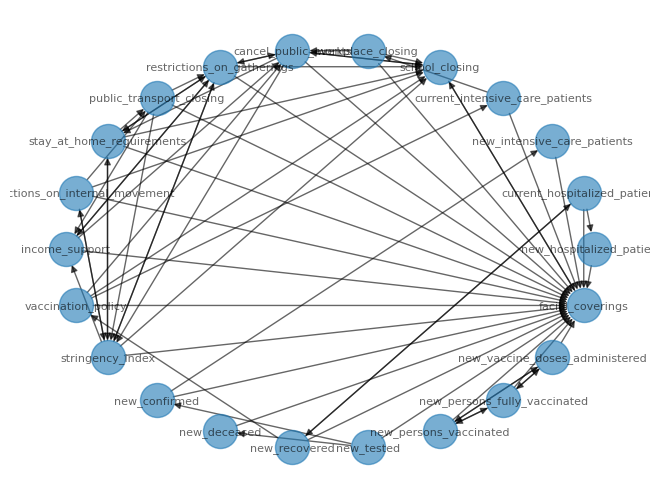

In [78]:
for node in graph_discovery_no_cumul.names:
    print(f'inspecting {node}')
    graph_discovery_no_cumul.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
graph_discovery_no_cumul.plot_graph()

In [79]:
graph_discovery_no_cumul.G.remove_node('facial_coverings')

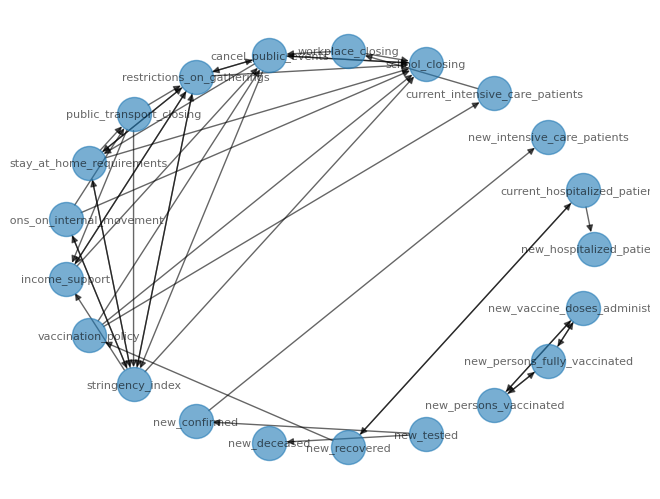

In [80]:

plot_a_network(graph_discovery_no_cumul.G)

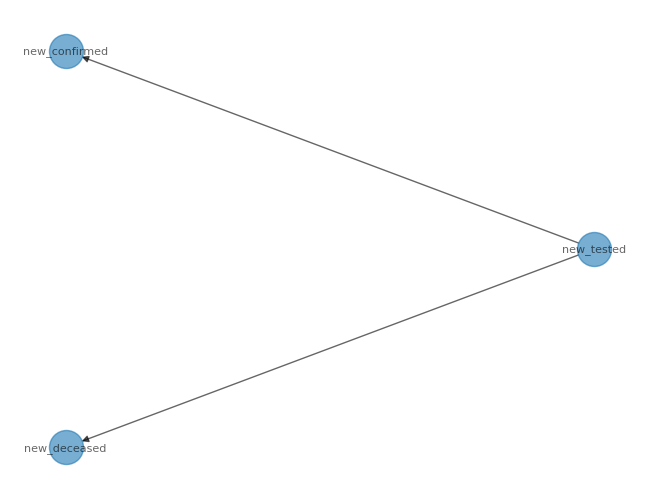

In [81]:
plot_a_network(nx.ego_graph(graph_discovery_no_cumul.G.reverse(),'new_tested',undirected=True,radius=1).reverse())

# Delete redundant information

In [11]:
reduced_names = ['new_hospitalized_patients',
       'current_hospitalized_patients','current_intensive_care_patients',
       'stringency_index', 'new_confirmed', 'new_deceased',# 'new_recovered',
       'new_tested', #'cumulative_deceased',
       'new_persons_vaccinated']

In [12]:

X_reduced=df[reduced_names].to_numpy()
X_reduced=(X_reduced-onp.mean(X_reduced,axis=0))/onp.std(X_reduced,axis=0)

In [13]:

graph_discovery_reduced=GraphDiscoveryNew(X_reduced.T,beta,onp.array(reduced_names),l=1)

Computing kernel matrix


inspecting new_hospitalized_patients
linear kernel (using gamma=3.30e+01)
 n/(n+s)=0.54, Z=-15.80
decision : refused
quadratic kernel (using gamma=3.23e+00)
 n/(n+s)=0.61, Z=-15.48
decision : refused
gaussian kernel (using gamma=4.46e-04)
 n/(n+s)=0.72, Z=-5.99
decision : accepted
new_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.72)
ancestors after pruning:  ['new_tested'] 



inspecting current_hospitalized_patients
linear kernel (using gamma=3.95e+01)
 n/(n+s)=0.55, Z=-15.81
decision : refused
quadratic kernel (using gamma=3.78e+00)
 n/(n+s)=0.56, Z=-15.52
decision : refused
gaussian kernel (using gamma=7.01e-04)
 n/(n+s)=0.57, Z=-8.71
decision : accepted
current_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.57)
ancestors after pruning:  ['current_intensive_care_patients'] 



inspecting current_intensive_care_patients
linear kernel (using gamma=3.40e+01)
 n/(n+s)=0.63, Z=-15.78
decision : refused
quadratic kernel (using gamma=3.67e+00)
 n

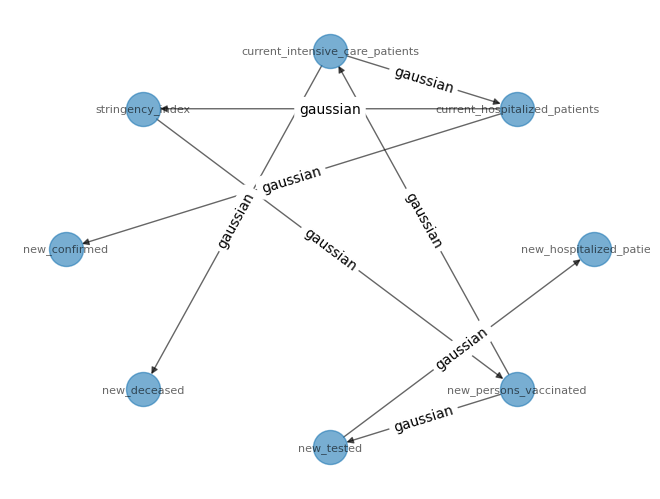

In [14]:
for node in graph_discovery_reduced.names:
    print(f'inspecting {node}')
    graph_discovery_reduced.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
graph_discovery_reduced.plot_graph()

# Testing SIR

Computing kernel matrix
inspecting S
linear kernel (using gamma=4.45e+00)
 n/(n+s)=0.89, Z=-15.77
decision : refused
quadratic kernel (using gamma=1.44e-01)
 n/(n+s)=0.57, Z=-15.70
decision : refused
gaussian kernel (using gamma=4.53e-07)
 n/(n+s)=0.89, Z=-14.17
decision : accepted
S has ancestors with gaussian kernel (n/(s+n)=0.89)
ancestors after pruning:  ['I'] 



inspecting I
linear kernel (using gamma=1.63e+01)
 n/(n+s)=0.20, Z=-15.86
decision : accepted
I has ancestors with linear kernel (n/(s+n)=0.20)
ancestors after pruning:  ['R'] 



inspecting R
linear kernel (using gamma=1.65e+01)
 n/(n+s)=0.19, Z=-15.86
decision : accepted
R has ancestors with linear kernel (n/(s+n)=0.19)
ancestors after pruning:  ['I'] 



inspecting dS
linear kernel (using gamma=1.08e+01)
 n/(n+s)=0.92, Z=-15.48
decision : refused
quadratic kernel (using gamma=5.98e-02)
 n/(n+s)=0.96, Z=-14.09
decision : refused
gaussian kernel (using gamma=7.65e-07)
 n/(n+s)=0.98, Z=-8.81
decision : accepted
dS has anc

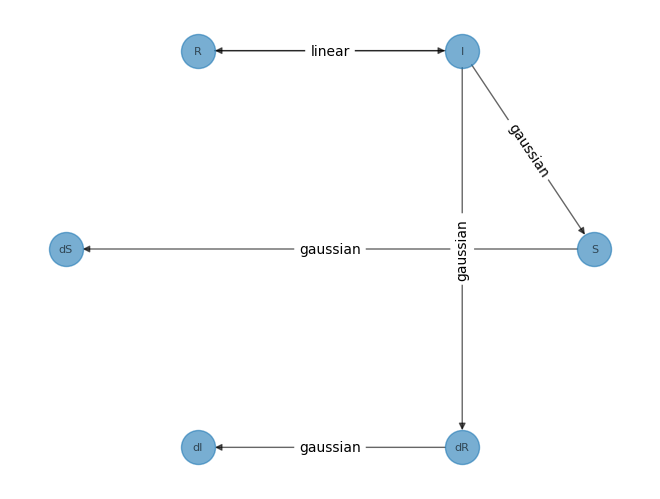

In [9]:
SIR_names=['cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered',
       'cumulative_persons_fully_vaccinated','new_confirmed','new_recovered']

total_pop=67.57e6
SIR_names=['S','I','R','dS','dI','dR']
S=total_pop-df['cumulative_deceased']-df['cumulative_persons_fully_vaccinated']
I=df['cumulative_confirmed']-df['cumulative_recovered']
R=df['cumulative_recovered']
dS=-df['new_deceased']-df['new_persons_vaccinated']
dI=df['new_confirmed']
dR=df['new_recovered']



#X_SIR=df[SIR_names].to_numpy()
X_SIR=pd.concat([S,I,R,dS,dI,dR],axis=1).to_numpy()
X_SIR=(X_SIR-onp.mean(X_SIR,axis=0))/onp.std(X_SIR,axis=0)
graph_discovery_SIR=GraphDiscoveryNew(X_SIR.T,beta,onp.array(SIR_names),l=5)

for node in graph_discovery_SIR.names:
    print(f'inspecting {node}')
    graph_discovery_SIR.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
graph_discovery_SIR.plot_graph()